# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [115]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [116]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [117]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [118]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2).sort_values(ascending=False)

Climate                               9.69
Literacy (%)                          7.93
Industry                              7.05
Service                               6.61
Agriculture                           6.61
Deathrate                             1.76
Phones (per 1000)                     1.76
Infant mortality (per 1000 births)    1.32
Net migration                         1.32
Birthrate                             1.32
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
GDP ($ per capita)                    0.44
Region                                0.00
Coastline (coast/area ratio)          0.00
Pop. Density (per sq. mi.)            0.00
Area (sq. mi.)                        0.00
Population                            0.00
Country                               0.00
dtype: float64

In [119]:
df.isnull().sum(axis=1).sort_values(ascending=False).head(25)

223    9
221    7
134    7
78     5
174    4
140    4
80     4
144    4
171    4
85     4
177    4
153    3
138    3
208    3
47     3
181    3
83     3
4      3
3      3
66     2
141    1
52     1
50     1
185    1
58     1
dtype: int64

In [120]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Spaces before and after values          <br>
2- Data types  <br>
3- Nulls      <br>
          

In [121]:
#make a copy for the original dataset
df_copy=df.copy()


In [122]:
#remove spaces before and after string

for i in range(df_copy.shape[1]):
    
    if df_copy.iloc[:,i].dtype == object:
        
        df_copy.iloc[:,i]=df_copy.iloc[:,i].str.lstrip()
        df_copy.iloc[:,i]=df_copy.iloc[:,i].str.rstrip()
        



In [123]:
#convert objects into float

for i in range(4, df_copy.shape[1]):
    
    df_copy.iloc[:,i].replace(",",".",inplace=True,regex=True)
    df_copy.iloc[:,i] = df_copy.iloc[:,i].astype(float)    
        


In [124]:

df_copy.iloc[:,14].value_counts().index[0]

2.0

In [125]:
for col in range(df_copy.shape[1]):
    
    most_freq = df_copy.iloc[:,col].value_counts().index[0]
    
    df_copy.iloc[:,col].fillna(most_freq,inplace=True)
    

In [127]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [128]:
#solution 

#remove spaces before and after string

for i in range(df.shape[1]):
    
    if df.iloc[:,i].dtype == object:
        
        df.iloc[:,i]=df.iloc[:,i].str.lstrip()
        df.iloc[:,i]=df.iloc[:,i].str.rstrip()
        



In [129]:
#test 

df["Region"]

0      ASIA (EX. NEAR EAST)
1            EASTERN EUROPE
2           NORTHERN AFRICA
3                   OCEANIA
4            WESTERN EUROPE
               ...         
222               NEAR EAST
223         NORTHERN AFRICA
224               NEAR EAST
225      SUB-SAHARAN AFRICA
226      SUB-SAHARAN AFRICA
Name: Region, Length: 227, dtype: object

**Second issue**

In [130]:
#solution 

#convert objects into float

for i in range(4, df.shape[1]):
    
    df.iloc[:,i].replace(",",".",inplace=True,regex=True)
    df.iloc[:,i] = df.iloc[:,i].astype(float)    
        


In [131]:
#test 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**Third issue**

In [134]:
#Solution
#Fill nulls with most frequante value

for col in range(df.shape[1]):
    
    most_freq = df.iloc[:,col].value_counts().index[0]
    
    df.iloc[:,col].fillna(most_freq,inplace=True)
 

In [135]:
#Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [136]:
from sklearn import preprocessing

In [139]:
df_scaled = df.copy()
col_names = ["Population","Area (sq. mi.)","Pop. Density (per sq. mi.)","Coastline (coast/area ratio)","Net migration","Infant mortality (per 1000 births)","GDP ($ per capita)","Literacy (%)","Phones (per 1000)","Arable (%)","Crops (%)","Other (%)","Climate","Birthrate","Deathrate","Agriculture","Industry","Service"]
features = df_scaled[col_names]

In [140]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled



,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),1.539846,1.283044,-0.191304,-0.071254,12.233422,3.016978,-0.347826,-2.581081,-0.459911,0.103520,-0.186101,0.066695,-4.0,1.625110,2.642780,1.606648,-0.115152,-0.844075
1,Albania,EASTERN EUROPE,-0.070652,-0.132335,0.284472,0.051733,-2.615385,0.012946,-0.072464,-0.306306,-0.265542,0.633540,0.803298,-0.488814,4.0,-0.222353,-0.640608,0.786704,-0.430303,-0.016632
2,Algeria,NORTHERN AFRICA,1.649640,5.250072,-0.403727,-0.067350,-0.206897,0.214134,0.036232,-1.049550,-0.245820,-0.423543,-0.179034,0.441537,-4.0,-0.103256,-0.773073,0.060942,2.066667,-1.185031
3,American Samoa,OCEANIA,-0.277207,-0.197640,1.314286,5.618350,-10.986737,-0.247029,0.181159,0.166667,0.272688,-0.022479,3.295642,-0.467286,0.0,0.208859,-1.064061,-0.443213,-0.903030,0.419958
4,Andorra,WESTERN EUROPE,-0.276422,-0.197025,0.455280,-0.071254,3.501326,-0.357810,0.978261,0.301802,0.952122,-0.482697,-0.237927,0.494301,4.0,-0.597829,-0.416938,-0.443213,-0.903030,0.419958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,-0.136371,-0.184691,2.118634,-0.071254,1.580902,-0.027377,-0.340580,0.256757,-0.054023,0.385685,4.230860,-0.926129,4.0,0.749193,-0.922910,0.000000,0.127273,0.195426
223,Western Sahara,NORTHERN AFRICA,-0.264592,0.410373,-0.483230,-0.030259,0.000000,-0.232598,-0.340580,0.256757,-0.462484,-0.612836,-0.237927,0.587168,-4.0,0.092696,0.247557,-0.443213,-0.903030,-0.760915
224,Yemen,NEAR EAST,0.977084,1.009622,-0.237267,-0.036115,0.000000,0.861418,-0.340580,-1.941441,-0.362727,-0.449571,-0.181390,0.460532,-4.0,1.407451,0.028230,0.249307,1.290909,-0.790021
225,Zambia,SUB-SAHARAN AFRICA,0.393608,1.523489,-0.394410,-0.071254,0.000000,1.429966,-0.340580,-0.572072,-0.445620,-0.195209,-0.230860,0.288307,0.0,1.296568,2.553746,0.720222,0.187879,-0.390852


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

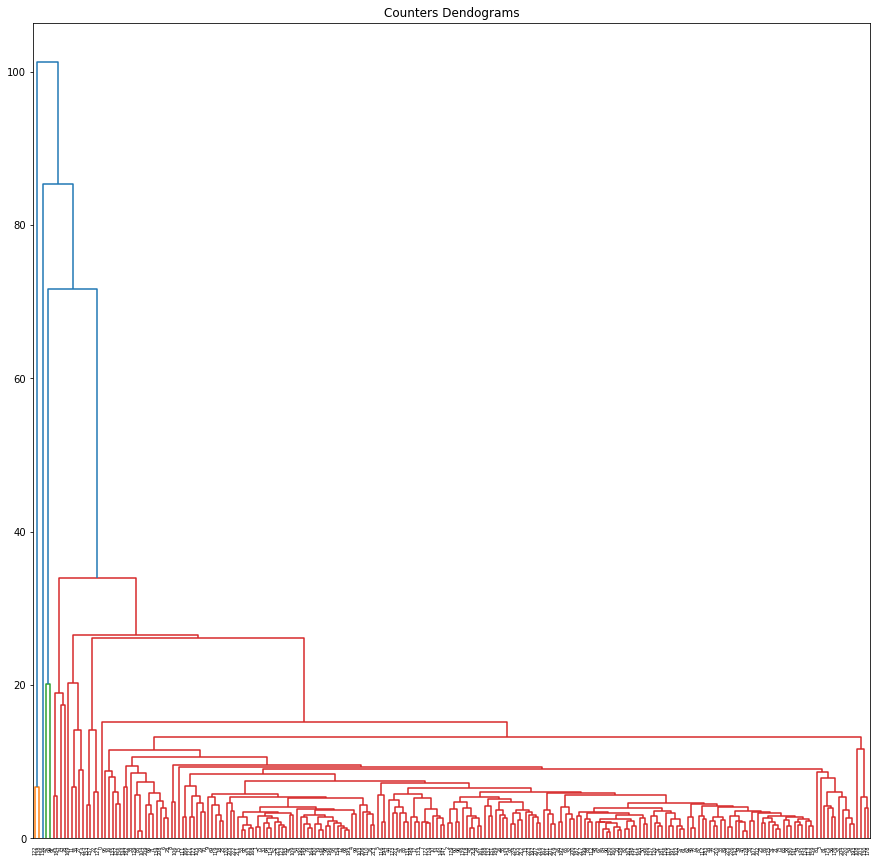

In [169]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 15))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_scaled[col_names] , method="average",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function
        

In [172]:
#training
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=4).fit(df_scaled[col_names])
clustering

clustering.labels_



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [173]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

labels = clustering.labels_
metrics.silhouette_score(df_scaled[col_names], labels, metric='euclidean')

0.8508334214183975

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 